<a href="https://colab.research.google.com/github/naomori/codexa_ImageRecognitionForBeginner/blob/master/Chapter3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3: 画像データの変形

本セクションでは、OpenCVを使って画像データの基本操作を行います。

まずは画像データをRGBそれぞれに切り分けます。
![ここ](https://www.codexa.net/wp-content/uploads/2018/12/logo_cv2.png)から画像をダウンロードして、この画像を使って操作を習得します。

In [1]:
from google.colab import files
uploaded = files.upload() 

Saving logo_cv2.png to logo_cv2.png


まずは RGB すべてを含めて Numpy 配列に変換します。

In [0]:
import cv2

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [0]:
logo = cv2.imread('logo_cv2.png', 1)

In [5]:
logo.shape

(50, 50, 3)

画像データは、Blue, Green, Red の順番になっています。
OpenCVの色順序の初期値が BGR になっているためです。

これを Red, Green, Blue に変更するには、OpenCV の cvtColor()関数を使います。

In [6]:
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)
logo.shape

(50, 50, 3)

それぞれのチャンネル(R,G,B)を入れ替えただけなので、配列のサイズには変更はありません。
各チャンネル（R,G,B）を単体で表示すると、グレースケールとして扱われてしまいます。
そのため、それぞれのカラーで表示するには、3次元として、該当の色以外の輝度を 0 にします。

In [0]:
red = cv2.imread('logo_cv2.png', 1)
red = cv2.cvtColor(red, cv2.COLOR_BGR2RGB)
red[:, :, 1] = 0
red[:, :, 2] = 0

green = cv2.imread('logo_cv2.png', 1)
green = cv2.cvtColor(green, cv2.COLOR_BGR2RGB)
green[:, :, 0] = 0
green[:, :, 2] = 0

blue = cv2.imread('logo_cv2.png', 1)
blue = cv2.cvtColor(blue, cv2.COLOR_BGR2RGB)
blue[:, :, 0] = 0
blue[:, :, 1] = 0

各チャンネルの配列を画像として表示してみます。

Text(0.5, 1.0, 'blue')

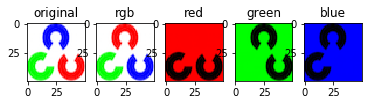

In [14]:
fig, ax = plt.subplots(1, 5, figsize=(6,3))

orig = cv2.imread('logo_cv2.png', 1)
plt.subplot(151)
plt.imshow(orig)
plt.title('original')

plt.subplot(152)
plt.imshow(logo)
plt.title('rgb')

plt.subplot(153)
plt.imshow(red)
plt.title('red')

plt.subplot(154)
plt.imshow(green)
plt.title('green')

plt.subplot(155)
plt.imshow(blue)
plt.title('blue')

## 画像のぼかし処理

OpenCV には「ぼかし」の処理を加える blur()関数があります。
ぼかしが解りやすいように![猫](https://www.codexa.net/wp-content/uploads/2018/12/cat.jpg)の画像を使います。

In [0]:
from google.colab import files
uploaded = files.upload() 

Saving cat.jpg to cat.jpg


In [0]:
cat = cv2.imread('cat.jpg', 1)
cat.shape